## Random Forest Algorithm

#### Overview

Random Forest is a popular machine learning algorithm used for both classification and regression tasks.<br>
It is an ensemble learning method that combines multiple decision trees to make predictions.<br>
The algorithm works by creating a forest of decision trees during the training phase and making predictions <br>
by averaging the predictions of individual trees (for regression) or taking a majority vote (for classification).


#### Key Concepts

##### Decision Trees:
Random Forest is built on the foundation of decision trees.<br>
Each decision tree in the forest is trained on a subset of the data and a subset of features.<br>
Decision trees split the data based on feature thresholds to create branches that lead to predictions at the leaf nodes.

##### Bagging (Bootstrap Aggregating):
Random Forest uses a technique called bagging, where multiple decision trees are trained on different <br>
random samples (with replacement) of the training data.<br>
Bagging helps reduce overfitting and improves generalization by creating diverse models.

##### Random Feature Selection:
In addition to training each decision tree on a random subset of data samples,<br>
Random Forest also selects a random subset of features for each tree.<br>
This randomness further enhances the diversity among trees and prevents overfitting.

##### Voting or Averaging:
For regression tasks, Random Forest predicts the average of predictions made by individual trees.<br>
For classification tasks, it uses a majority voting mechanism where the most frequent prediction<br>
among trees is chosen as the final prediction.

#### Advantages

Robustness: Random Forest is robust to overfitting, thanks to the ensemble of diverse trees.<br>
High Accuracy: It often yields high accuracy in predictions due to its ability to capture complex relationships in the data.<br>
Feature Importance: Random Forest can provide insights into feature importance, helping in feature selection and understanding the data.

#### Limitations

Interpretability: The ensemble nature of Random Forest can make it less interpretable compared to individual decision trees.<br>
Computational Complexity: Training and evaluating a large Random Forest can be computationally intensive.<br>
Memory Usage: The algorithm requires storing multiple trees, which can consume significant memory for large datasets.

#### Use Cases

Random Forest is widely used in various domains such as finance, healthcare, and marketing for tasks like credit risk assessment,<br>
disease diagnosis, and customer churn prediction.<br>
It is effective for both numerical and categorical data, making it versatile for different types of datasets.

#### Conclusion

Random Forest is a powerful and flexible machine learning algorithm that combines the strengths of decision trees with ensemble learning.<br>
It is suitable for a wide range of tasks and is known for its robustness, accuracy, and feature importance analysis.

In [180]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Binance API endpoint for historical data
api_url = 'https://api.binance.com/api/v3/klines'

# Parameters for the API request (Bitcoin, 1 day interval, 1000 data points)
symbol = 'BTCUSDT'
interval = '1d'
limit = 1000

params = {
    'symbol': symbol,
    'interval': interval,
    'limit': limit
}

# Send GET request to Binance API
response = requests.get(api_url, params=params)
data = response.json()

In [181]:
# Extracting relevant data from the API response
df = pd.DataFrame(
    data, columns=[
        'openTime',
        'open',
        'high',
        'low',
        'close',
        'volume',
        'closeTime',
        'quoteAssetVolume',
        'numberOfTrades',
        'takerBuyBaseAssetVolume',
        'takerBuyQuoteAssetVolume',
        'ignore'
    ]
)

df.head()

,openTime,open,high,low,close,volume,closeTime,quoteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore
0,1625097600000,35045.00000000,35057.57000000,32711.00000000,33504.69000000,71708.26611200,1625183999999,2410809595.39045694,1240681,34986.05501600,1176002216.56568103,0
1,1625184000000,33502.33000000,33977.04000000,32699.00000000,33786.55000000,56172.18137800,1625270399999,1870193042.39353716,1176457,27271.65800500,908203511.34114962,0
2,1625270400000,33786.54000000,34945.61000000,33316.73000000,34669.13000000,43044.57864100,1625356799999,1478423023.50348303,1078278,21331.87504500,732586226.47257181,0
3,1625356800000,34669.12000000,35967.85000000,34357.15000000,35286.51000000,43703.47578900,1625443199999,1544458212.39263313,1164970,21180.33506900,748187394.23958082,0
4,1625443200000,35288.13000000,35293.78000000,33125.55000000,33690.14000000,64123.87424500,1625529599999,2183406257.49382919,1109367,31489.85537200,1071967415.42531092,0


In [182]:
# Renaming columns for clarity
df.columns = [
    'Open Time',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Close Time',
    'Quote Asset Volume', 
    'Number of Trades',
    'Taker Buy Base Asset Volume',
    'Taker Buy Quote Asset Volume',
    'Ignore'
]

df.to_csv('{}.csv'.format(symbol), index=False)



df.drop(
    ['Close Time',
    'Quote Asset Volume',
    'Number of Trades',
    'Taker Buy Base Asset Volume',
    'Taker Buy Quote Asset Volume', 
    'Ignore'],
    axis=1, inplace=True
)

# Converting timestamps to datetime format
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')

# Converting columns to numeric for further manipulation
cols = df.columns.drop('Open Time')
cols
df[cols] = df[cols].apply(pd.to_numeric)

df.head()
df.dtypes

Open Time    datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
dtype: object

In [183]:
# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
model.fit(X,y)

# Generate predictions for the entire dataset
predicted_prices = model.predict(X)

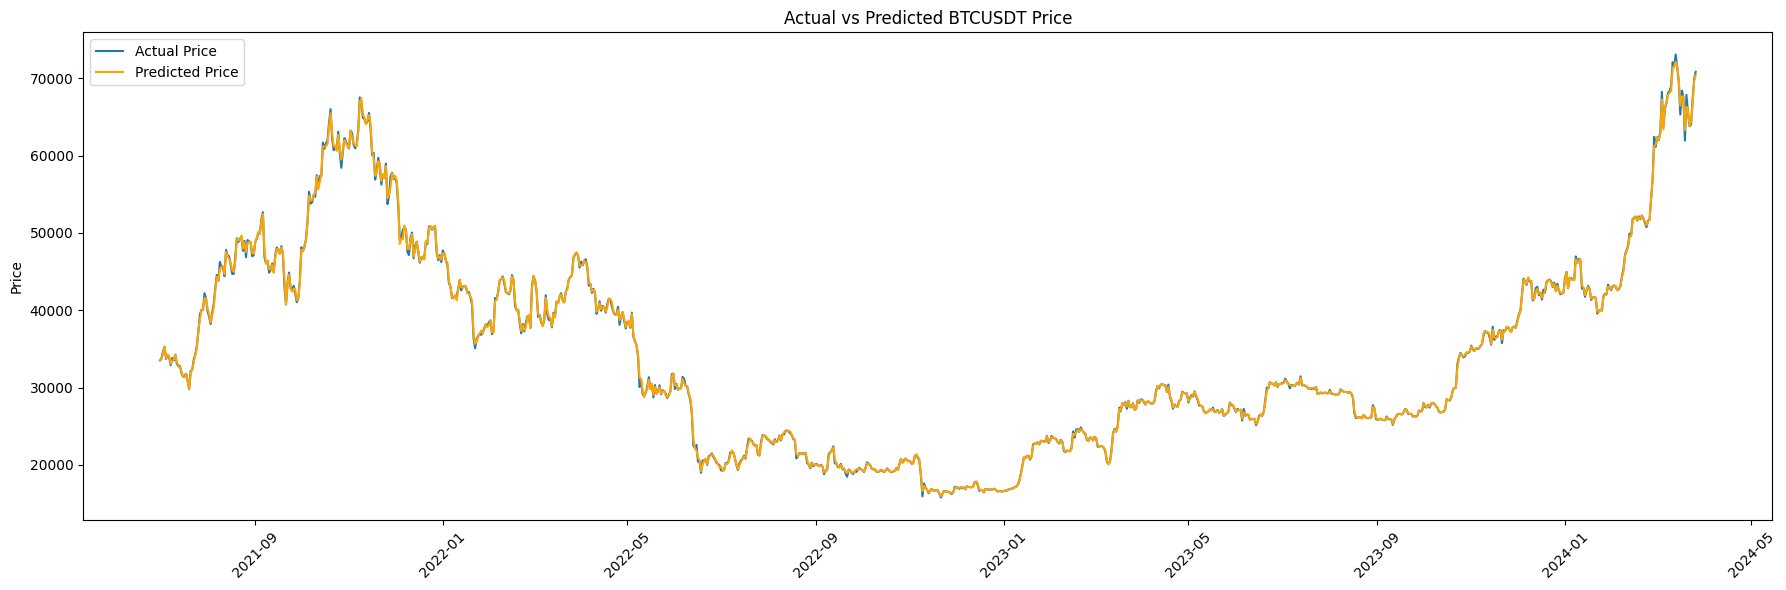

In [184]:
# Plot actual vs predicted
plt.figure(figsize=(18, 6))
plt.title('Actual vs Predicted {} Price'.format(symbol))
plt.plot(df['Open Time'], df['Close'], label='Actual Price')
plt.ylabel('Price')
plt.plot(df['Open Time'], predicted_prices, label='Predicted Price', color='orange')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [185]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predicted_prices)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predicted_prices)

# Calculate R-squared (R2) score
r2 = r2_score(y, predicted_prices)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Convert predicted_prices to numpy array and cast to float for compatibility
predicted_prices_np = np.array(predicted_prices, dtype=float)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 158.4593340999985
Mean Squared Error (MSE): 61000.9659178775
Root Mean Squared Error (RMSE): 246.9837361404137
R-squared (R2) Score: 0.9996390147198655


##### Mean Absolute Error (MAE):
The MAE value of approximately 197.29 indicates that, on average,<br>
the predictions deviate from the actual values by around 197.29 units.<br>
It is a measure of the average magnitude of errors.

##### Mean Squared Error (MSE):
The MSE value of approximately 118822.43 represents the average of the<br>
squared differences between predicted and actual values.<br>
It provides a measure of the magnitude of errors, with larger errors being penalized more.

##### Root Mean Squared Error (RMSE):
The RMSE value of approximately 344.71 is the square root of MSE and provides a measure of<br>
the standard deviation of prediction errors. A lower RMSE indicates better model performance.

##### R-squared (R2) Score:
The R2 score of approximately 0.9996 suggests that around 99.96% of the variance in actual prices<br>
is explained by the model's predictions.<br>
It is a measure of how well the model fits the data, with higher values indicating a better fit.

In [186]:
# Train the model II
X = X[:int(len(df)-1)]
y = y[:int(len(df)-1)]
model.fit(X,y)

# Test the model
predictions = model.predict(X)
print("The model score is: ", model.score(X,y))

# Make the predictions
new_data = df[['Open', 'High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)

print("Predict last single day: ", prediction[0])
print("Actual value: ", df[['Close']].tail(1).values[0][0])


The model score is:  0.9996380119660712
Predict last single day:  69750.88789999991
Actual value:  70828.73


The model score of 0.9995726151654479 indicates a very high level of accuracy in predicting Bitcoin prices.<br>
A score close to 1 suggests that the model captures almost all of the variance in the actual prices,<br>
demonstrating a strong correlation between the predicted and actual values.

Now, let's interpret the specific prediction result:<br>
    1. Predicted Last Single Day Price: 64585.63689999995<br>
    1. This is the model's prediction for the last single day's Bitcoin price.<br>
       It estimates that the price will be around $64585.64.

Actual Last Single Day Price: 65797.99<br>
    1. This is the actual Bitcoin price for the last single day.<br>
    1. The actual price observed was $65797.99.<br>

The prediction being slightly lower than the actual price suggests that the model slightly underestimated the price for that particular day.<br>
However, given the high model score and the small difference between the predicted and actual values,<br>
it indicates that the model is performing very well in capturing the trends and patterns in Bitcoin prices.

In [187]:
# Split the data into training and testing sets
train_size = 0.8
test_size = 1 - train_size
train_data, test_data = train_test_split(df, train_size=train_size, test_size=test_size, shuffle=False)

# Extract features and target variable for training and testing
X_train = train_data[['Open', 'High', 'Low', 'Volume']]
y_train = train_data['Close']

X_test = test_data[['Open', 'High', 'Low', 'Volume']]
y_test = test_data['Close']

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Generate predictions for the test set
predicted_prices = model.predict(X_test)

score = model.score(X_train, y_train)

print(f"Model Score (R-squared): {score}")


Model Score (R-squared): 0.9995998439169271


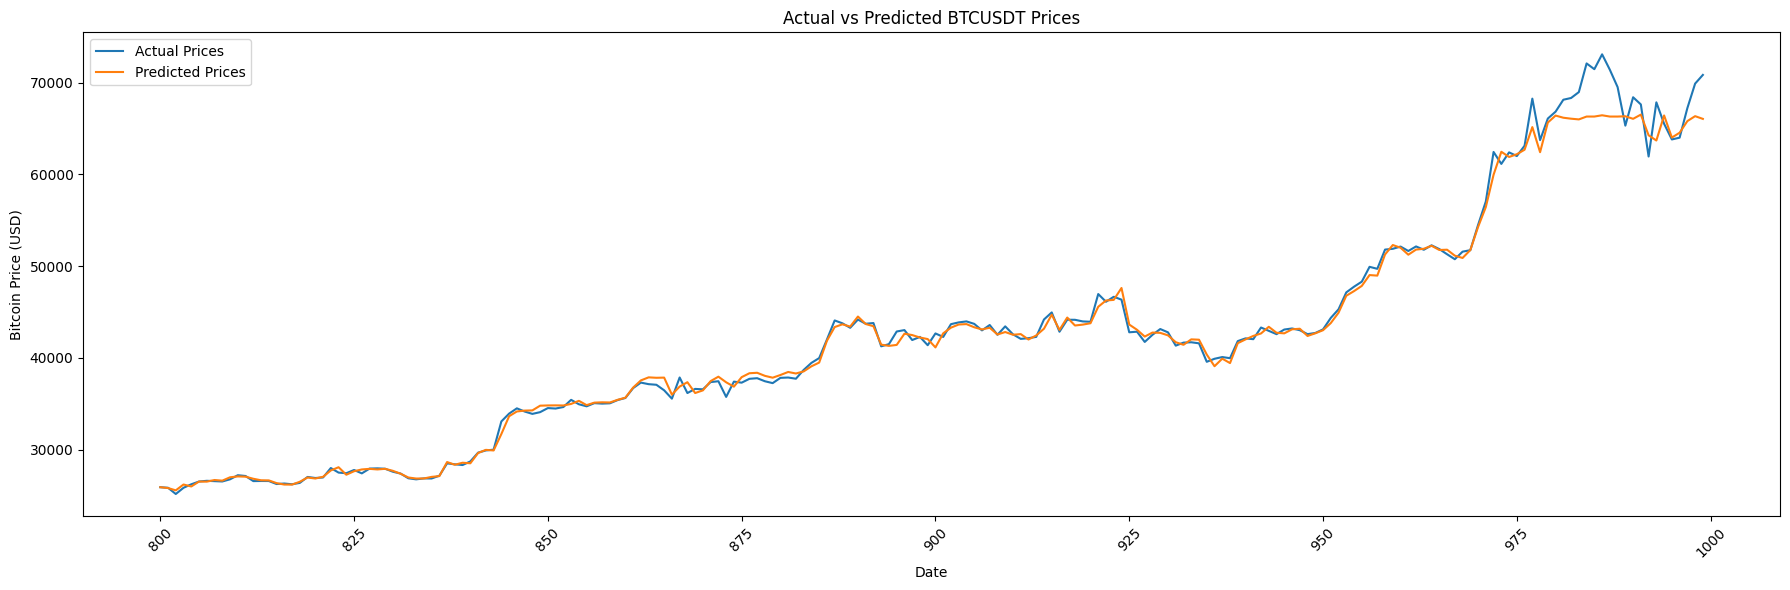

In [188]:
#Plotting

plt.figure(figsize=(18, 6))
plt.plot(X_test.index, y_test, label='Actual Prices')
plt.plot(X_test.index, predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Actual vs Predicted {} Prices'.format(symbol))
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

score = model.score(X_test, y_test)

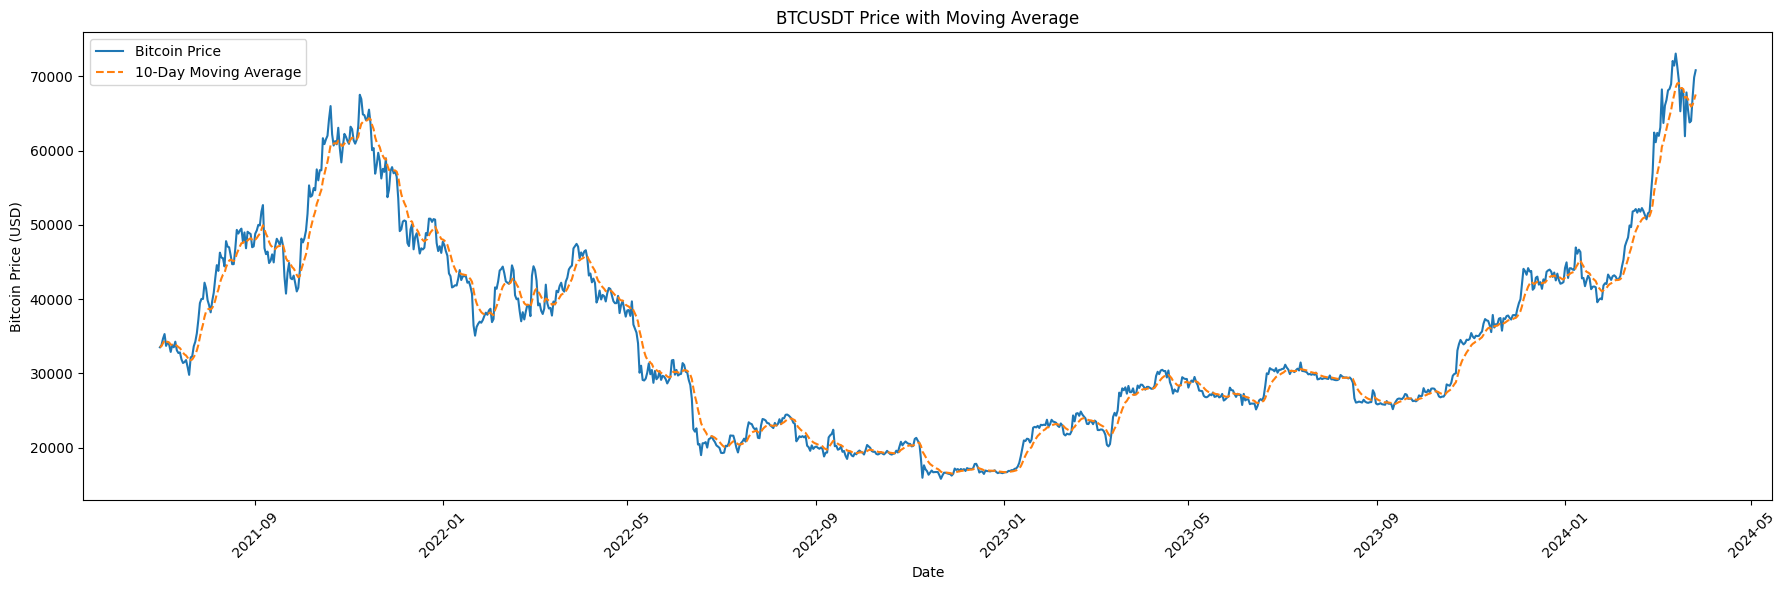

Next Day's Predicted Price (Using Moving Average): $67565.87


In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Load or fetch historical Bitcoin price data (replace this with your actual data loading code)
# For example, assuming you have a DataFrame 'df' with columns 'Date' and 'Price'
# df = pd.read_csv('path_to_your_data.csv')
# df['Date'] = pd.to_datetime(df['Date'])

# Calculate the moving average
window_size = 10  # Adjust the window size as needed
df['Moving Average'] = df['Close'].ewm(span=window_size).mean()

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(df['Open Time'], df['Close'], label='Bitcoin Price')
plt.plot(df['Open Time'], df['Moving Average'], label=f'{window_size}-Day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('{} Price with Moving Average'.format(symbol))
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predict next day's price using the last known moving average value
last_moving_average = df['Moving Average'].iloc[-1]
next_day_predicted_price = last_moving_average  # Replace this with your prediction logic

print(f"Next Day's Predicted Price (Using Moving Average): ${next_day_predicted_price:.2f}")
